# INFO 3350/6350

## Lecture 02(b): Pandas

Pandas is the general-purpose data library for Python. Its most important data type is the `DataFrame`. DataFrames are two-dimensional arrays of arbitrary types that have a bunch of convenient indexing, slicing, and mathematical manipulation functions. 

There's a sense in which pandas is a combination of python dictionaries (fast, convenient indexing and lookups) with numpy arrays (fast math). But don't overthink it. We're pandas users, not pandas developers.

A little more simply, a typical DataFrame looks like this:

In [1]:
import pandas as pd

book_dict =  {
    'author': ['Shakespeare', 'Morrison', 'Bolaño'],
    'title': ['King Lear', 'Beloved', '2666'],
    'year': [1606, 1987, 2004],
    'words': [10000, 100000, 300000]
}

book_df = pd.DataFrame(book_dict) # <- note that we're using the dict defined above
book_df

,author,title,year,words
0,Shakespeare,King Lear,1606,10000
1,Morrison,Beloved,1987,100000
2,Bolaño,2666,2004,300000


Notice that this DataFrame consists of **rows** and **columns**. It might remind you of a spreadsheet or a database table.

You can think of a **row** as a **record** or an **observation**. It contains all the information about an *individual object*.

A **column** contains the data about a **single feature** for **all objects** in the DataFrame.

Our DataFrame has three rows (books) and four columns (features of those books).

Note the special pseudo-column at the left, the **index**.

In [2]:
# columns have types
book_df.dtypes

author    object
title     object
year       int64
words      int64
dtype: object

In [3]:
# more info about our dataframe
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   author  3 non-null      object
 1   title   3 non-null      object
 2   year    3 non-null      int64 
 3   words   3 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 224.0+ bytes


In [4]:
# select a column, return a series
book_df['author']

0    Shakespeare
1       Morrison
2         Bolaño
Name: author, dtype: object

Think of this like a Python dictionary, where columns are keyed by name.

A Series is similar to a DataFrame, but has strictly one dimension. This is sometimes convenient, but is also sometimes the source of subtle bugs. When in doubt, select Pandas columns using **two** sets of square brackets, which returns a DataFrame, even if there's only one column in it.

Let's **do** something with a column:

In [5]:
# column-wise (vectorized) operations
book_df[['year']]+100

,year
0,1706
1,2087
2,2104


We **didn't** need to iterate over the elements in the column. The mathematical operation was applied automatically to very element. These kinds of vectorized operations are often much faster than loops. We'll try to use them whenever we can.

The above code returned a DataFrame. If we had left one of the sets of square brackets out, we would have returned a Pandas Series:

In [6]:
# return a series, not a frame
book_df['year']+100

0    1706
1    2087
2    2104
Name: year, dtype: int64

In [7]:
# did we modify the underlying dataframe?
book_df

,author,title,year,words
0,Shakespeare,King Lear,1606,10000
1,Morrison,Beloved,1987,100000
2,Bolaño,2666,2004,300000


In [8]:
# indexing
new_df = book_df.loc[1:2, ['year', 'title']]
new_df

,year,title
1,1987,Beloved
2,2004,2666


The general form here is `.loc[row_indexer, column_indexer]`. We'll have more to say about this in a minute. Here, notice that the row indexer is operating on labels, **not index positions**, and that it is inclusive. To index by positions, use `.iloc` (which behaves like regular python indexing, hence does not include the terminal value).

We can also manipulate the index, which isn't a column like the others.

In [9]:
# set an existing column to be the index
book_df.set_index(['author'], inplace=True)
book_df

,title,year,words
author,,,
Shakespeare,King Lear,1606,10000
Morrison,Beloved,1987,100000
Bolaño,2666,2004,300000


In [10]:
# select using the new index
book_df.loc['Morrison', 'title']

'Beloved'

In [11]:
book_df['title']

author
Shakespeare    King Lear
Morrison         Beloved
Bolaño              2666
Name: title, dtype: object

In [12]:
# pandas tries to infer what you meant, but can fail
# when in doubt, be explicit
# here, get all indices (rows) and just the 'title' column
book_df.loc[:,['title']]

,title
author,
Shakespeare,King Lear
Morrison,Beloved
Bolaño,2666


In [13]:
book_df

,title,year,words
author,,,
Shakespeare,King Lear,1606,10000
Morrison,Beloved,1987,100000
Bolaño,2666,2004,300000


In [14]:
# modify the underlying dataframe
book_df['year'] = book_df['year']+100
book_df

,title,year,words
author,,,
Shakespeare,King Lear,1706,10000
Morrison,Beloved,2087,100000
Bolaño,2666,2104,300000


In [15]:
# create a new column based on an existing one
book_df['old_year'] = book_df['year']-100
book_df

,title,year,words,old_year
author,,,,
Shakespeare,King Lear,1706,10000,1606
Morrison,Beloved,2087,100000,1987
Bolaño,2666,2104,300000,2004


In [16]:
# you can call the index itself
book_df.index

Index(['Shakespeare', 'Morrison', 'Bolaño'], dtype='object', name='author')

In [17]:
# but you can't select an index by name
book_df[['author']]

KeyError: "None of [Index(['author'], dtype='object')] are in the [columns]"

In [18]:
# for reference, can get values of a named index
book_df.index.get_level_values('author')

Index(['Shakespeare', 'Morrison', 'Bolaño'], dtype='object', name='author')

## Indexing, slicing, and setting values

Dataframes are valuable mostly because they make it easy to select and group data. Let's take a look at how this works.

In [19]:
d = {
    'a':[1,2,3],
    'b':[4,5,6]
}
df = pd.DataFrame(d)
df

,a,b
0,1,4
1,2,5
2,3,6


In [20]:
# Add a column
df['c'] = [True, True, False] # a boolean column

In [21]:
df

,a,b,c
0,1,4,True
1,2,5,True
2,3,6,False


In [22]:
# get the value at row 0, column b
df.loc[0,'b'] # format is row label, column label

4

In [23]:
# alternatively, when we want a SINGLE value only
df.at[0, 'b']

4

In [24]:
# Make the index confusing
df.index = [5,18,3]
df

,a,b,c
5,1,4,True
18,2,5,True
3,3,6,False


In [25]:
# Indices are labels, NOT positions!
df.loc[18:3]

,a,b,c
18,2,5,True
3,3,6,False


In [26]:
# Select by index position
df.iloc[[1]]

,a,b,c
18,2,5,True


In [27]:
# Select using boolean array
df.loc[[True, True, False]]

,a,b,c
5,1,4,True
18,2,5,True


In [28]:
# did not modify df
df

,a,b,c
5,1,4,True
18,2,5,True
3,3,6,False


Selections are (usually) **views** into the existing dataframe. They do not (usually) create new dataframes. This is good and efficient, but can sometimes be tricky ...

### Set value on copy of slice warning

As we just saw, you can select rows using `.loc`. It's tempting to then select columns from the resulting subset of rows. This is called chained indexing. There's nothing inherently wrong with chaining, but it can be the source of downstream problems. To wit:

#### The wrong way!

In [29]:
# Select rows ...
subset = df[ df['b']<=5 ]
subset

,a,b,c
5,1,4,True
18,2,5,True


In [30]:
# How does this work?
df['b'] <= 5

5      True
18     True
3     False
Name: b, dtype: bool

So, we pass a boolean array in as a row selector, then ...

In [31]:
# Then select columns from the subset and try to modify their values
subset['c'] = False

/var/folders/xd/m092nj891q71xlv9zcn1sd8r0000gn/T/ipykernel_2845/1172438911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['c'] = False


Why does this happen? Why throw a warning here?

In [32]:
# What was the output?
display(subset) # FYI, note use of display() IPython function

,a,b,c
5,1,4,False
18,2,5,False


In [33]:
# Compare the original dataframe
df

,a,b,c
5,1,4,True
18,2,5,True
3,3,6,False


Eep! This **did not** modify the original dataframe. Did we want it to? Pandas doesn't know, and the outcome is unpredictable (it depends on certain low-level memory layout features that Pandas doesn't control). Hence, the warning.

#### The correct way

Be explicit using `loc` and do it in a single operation!

In [34]:
# From the warning: "Try using .loc[row_indexer,col_indexer] = value instead"
df.loc[ df['b']<=5, 'c' ] = False
df

,a,b,c
5,1,4,False
18,2,5,False
3,3,6,False


In [35]:
# or we can use explicit .copy()
subset = subset.copy() # <- copy the data, so it's disassociated from the source df
display(subset)
subset['c'] = True
display(subset)

,a,b,c
5,1,4,False
18,2,5,False


,a,b,c
5,1,4,True
18,2,5,True


`.copy()`ing can be slow when you have a lot of data. Use with care.

## Working with real data

An example using COVID data from Tompkins County.

Note that **you** can use Sheets to share data for your group. Pull directly to Pandas as CSV over the web by inserting `/export?format=csv` between the document identifier and any `&gid=` sheet identifier in the URL. Unrestricted link sharing must be turned on.

For example:

```
https://docs.google.com/spreadsheets/d/1_EYNs90DIWYg9huCiRlw4H2FqofIhDutburi9RrUMYY/edit?usp=sharing
                                                                                    ^^^^^^^^^^^^^^^^
```

... becomes ...

```
https://docs.google.com/spreadsheets/d/1_EYNs90DIWYg9huCiRlw4H2FqofIhDutburi9RrUMYY/export?format=csv
                                                                                    ^^^^^^^^^^^^^^^^^
```

Or, you can use Google's [Python API library](https://developers.google.com/sheets/api/quickstart/python) for authenticated access (but it's probably overkill).

### Data prep

Read the [awkwardly formatted data table](https://docs.google.com/spreadsheets/d/e/2PACX-1vQvvugFsb4GePXQnmEZbgrtqmJRiaA7tO1UGSBwvBdhbJEmf2ntzE0am-x-Lo6mLPj9ASLpAg6UZsCF/pubhtml?gid=1214476126&single=true) over the web. Take a look at this and discuss what you expect on import (problems, data types, dataframe length and shape, etc.).

In [36]:
# Get data from TCHD's Google sheet
sheet = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQvvugFsb4GePXQnmEZbgrtqmJRiaA7tO1UGSBwvBdhbJEmf2ntzE0am-x-Lo6mLPj9ASLpAg6UZsCF/pubhtml?gid=1214476126&single=true'
fetched_data = pd.read_html(sheet, skiprows=1)
covid = fetched_data[0]
covid.head()

,1,Date,Total Tests,Daily Tests (ECLRS),New Positive Cases (TCHD),Total Positive Cases (TCHD),Released from Isolation (TCHD),Active Cases (TCHD),Active COVID-19 Hospitalizations (CHS),Total TC Resident Deaths (TCHD),Total Vaccinations 1st Dose,Total Vaccinations Completed,NYS Vaccine Tracker: Tompkins County 1st Dose,NYS Vaccine Tracker: Tompkins County Complete Series,Reported Positive Self-Tests,Total Positive Self-Tests
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,3/14/20,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3/15/20,46.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,3/16/20,51.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,3/17/20,107.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# working with .columns
print(covid.columns)

Index(['1', 'Date', 'Total Tests', 'Daily Tests (ECLRS)',
       'New Positive Cases (TCHD)', 'Total Positive Cases (TCHD)',
       'Released from Isolation (TCHD)', 'Active Cases (TCHD)',
       'Active COVID-19 Hospitalizations (CHS)',
       'Total TC Resident Deaths (TCHD)', 'Total Vaccinations 1st Dose',
       'Total Vaccinations Completed',
       'NYS Vaccine Tracker: Tompkins County 1st Dose',
       'NYS Vaccine Tracker: Tompkins County Complete Series',
       'Reported Positive Self-Tests', 'Total Positive Self-Tests'],
      dtype='object')


In [38]:
# get rid of undesired data
columns_to_retain = list(covid.columns)[1:] # discard first column
#columns_to_retain.pop()                     # discard last column
covid = covid.loc[1:, columns_to_retain]   # discard empty first row
covid.head()

,Date,Total Tests,Daily Tests (ECLRS),New Positive Cases (TCHD),Total Positive Cases (TCHD),Released from Isolation (TCHD),Active Cases (TCHD),Active COVID-19 Hospitalizations (CHS),Total TC Resident Deaths (TCHD),Total Vaccinations 1st Dose,Total Vaccinations Completed,NYS Vaccine Tracker: Tompkins County 1st Dose,NYS Vaccine Tracker: Tompkins County Complete Series,Reported Positive Self-Tests,Total Positive Self-Tests
1,3/14/20,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/15/20,46.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/16/20,51.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/17/20,107.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3/18/20,145.0,NaN,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Write out the good data to disk for later reuse
covid.to_csv('lec-02-tompkins-covid-data.csv', index=False)

### Read in cleaned data

First, examine the pure CSV using a text editor, then come back here.

In [40]:
covid = pd.read_csv('lec-02-tompkins-covid-data.csv')
covid.head()

,Date,Total Tests,Daily Tests (ECLRS),New Positive Cases (TCHD),Total Positive Cases (TCHD),Released from Isolation (TCHD),Active Cases (TCHD),Active COVID-19 Hospitalizations (CHS),Total TC Resident Deaths (TCHD),Total Vaccinations 1st Dose,Total Vaccinations Completed,NYS Vaccine Tracker: Tompkins County 1st Dose,NYS Vaccine Tracker: Tompkins County Complete Series,Reported Positive Self-Tests,Total Positive Self-Tests
0,3/14/20,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/15/20,46.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/16/20,51.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/17/20,107.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/18/20,145.0,NaN,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What is `NaN`?

### Change a column name

In [41]:
# option 1
col_names = list(covid.columns)
col_names[6] = 'active_cases'
covid.columns = col_names
covid.head()

,Date,Total Tests,Daily Tests (ECLRS),New Positive Cases (TCHD),Total Positive Cases (TCHD),Released from Isolation (TCHD),active_cases,Active COVID-19 Hospitalizations (CHS),Total TC Resident Deaths (TCHD),Total Vaccinations 1st Dose,Total Vaccinations Completed,NYS Vaccine Tracker: Tompkins County 1st Dose,NYS Vaccine Tracker: Tompkins County Complete Series,Reported Positive Self-Tests,Total Positive Self-Tests
0,3/14/20,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/15/20,46.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/16/20,51.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/17/20,107.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/18/20,145.0,NaN,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# option 2
covid.rename(columns={'Active COVID-19 Hospitalizations (CHS)':'active_hospitalizations'}, inplace=True)
covid.head()

,Date,Total Tests,Daily Tests (ECLRS),New Positive Cases (TCHD),Total Positive Cases (TCHD),Released from Isolation (TCHD),active_cases,active_hospitalizations,Total TC Resident Deaths (TCHD),Total Vaccinations 1st Dose,Total Vaccinations Completed,NYS Vaccine Tracker: Tompkins County 1st Dose,NYS Vaccine Tracker: Tompkins County Complete Series,Reported Positive Self-Tests,Total Positive Self-Tests
0,3/14/20,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/15/20,46.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/16/20,51.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/17/20,107.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/18/20,145.0,NaN,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explore the data

In [43]:
# types
covid.dtypes

Date                                                     object
Total Tests                                             float64
Daily Tests (ECLRS)                                     float64
New Positive Cases (TCHD)                               float64
Total Positive Cases (TCHD)                             float64
Released from Isolation (TCHD)                          float64
active_cases                                            float64
active_hospitalizations                                 float64
Total TC Resident Deaths (TCHD)                         float64
Total Vaccinations 1st Dose                             float64
Total Vaccinations Completed                            float64
NYS Vaccine Tracker: Tompkins County 1st Dose           float64
NYS Vaccine Tracker: Tompkins County Complete Series    float64
Reported Positive Self-Tests                            float64
Total Positive Self-Tests                               float64
dtype: object

Why these data types? (Compare input data from sheet ...)

In [44]:
# table size
covid.shape

(679, 15)

In [45]:
# just table length
len(covid)

679

In [46]:
# get descriptive stats
covid.describe()

,Total Tests,Daily Tests (ECLRS),New Positive Cases (TCHD),Total Positive Cases (TCHD),Released from Isolation (TCHD),active_cases,active_hospitalizations,Total TC Resident Deaths (TCHD),Total Vaccinations 1st Dose,Total Vaccinations Completed,NYS Vaccine Tracker: Tompkins County 1st Dose,NYS Vaccine Tracker: Tompkins County Complete Series,Reported Positive Self-Tests,Total Positive Self-Tests
count,6.780000e+02,417.000000,677.000000,679.000000,662.000000,662.000000,665.000000,652.000000,106.000000,106.000000,295.000000,295.000000,34.000000,34.000000
mean,7.772222e+05,3017.261391,24.163959,3459.200295,3345.613293,181.933535,5.177444,20.208589,18091.150943,12087.566038,71765.193220,64342.013559,41.735294,783.735294
std,6.116046e+05,2289.469245,52.941952,3530.505575,3308.230272,338.154668,5.879444,16.934845,8147.655713,7074.380288,8749.977638,12739.836632,20.847656,476.194467
min,4.600000e+01,47.000000,0.000000,1.000000,28.000000,1.000000,0.000000,0.000000,7406.000000,1390.000000,40566.000000,19738.000000,13.000000,16.000000
25%,5.467175e+04,803.000000,2.000000,261.000000,313.250000,26.000000,1.000000,0.000000,10029.750000,6840.250000,68673.000000,63282.000000,25.250000,322.500000
50%,7.524810e+05,2865.000000,8.000000,3317.000000,3279.000000,84.500000,4.000000,27.000000,15760.000000,9203.000000,73077.000000,68517.000000,39.500000,854.000000
75%,1.290840e+06,4869.000000,24.000000,4588.500000,4518.500000,203.750000,7.000000,32.000000,25704.000000,19637.000000,77636.000000,71101.000000,52.750000,1202.750000
max,1.767740e+06,8585.000000,523.000000,16362.000000,15921.000000,2630.000000,32.000000,53.000000,30016.000000,28092.000000,82833.000000,75472.000000,90.000000,1419.000000


### Change column types

In [47]:
# 'Date' column has type 'object' (often used for strings)
covid['Date'].dtype

dtype('O')

In [48]:
# take one example date entry - it's a string
type(covid.at[0, 'Date'])

str

In [49]:
# convert Date column to datetime type
covid['Date'] = pd.to_datetime(covid['Date'])
covid[['Date']].head()

,Date
0,2020-03-14
1,2020-03-15
2,2020-03-16
3,2020-03-17
4,2020-03-18


In [50]:
covid['Date'].dtype

dtype('<M8[ns]')

In [51]:
# take one example date entry - it's now a Timestamp
type(covid.at[0, 'Date'])

pandas._libs.tslibs.timestamps.Timestamp

Datetime objects are useful because we can do convenient selection, sampling, and slicing with them. More about this next time ...

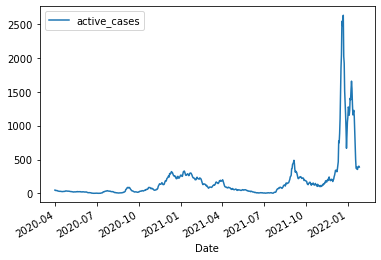

In [52]:
# plot directly from Pandas
covid[['Date', 'active_cases']].set_index(['Date']).plot();